In [1]:
import numpy as np
import matplotlib.pyplot as plt
import TSML
import time

In [2]:
def tanh(X):
    return (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))

In [3]:
def get_one_hot(targets):
    targets=np.asarray(targets).reshape(-1)
    num_classes=len(np.unique(targets))
    indices=np.searchsorted(np.unique(targets),targets)
    res = np.eye(num_classes)[indices]
    return res.reshape(len(targets),num_classes)

In [4]:
def mat_ohe(data,cols_to_ohe):
    ohe_cols=np.apply_along_axis(get_one_hot,0,data[:,cols_to_ohe])[:,:,0]
    data=np.hstack((data,ohe_cols))
    data=np.delete(data,cols_to_ohe,1)
    return data.astype(float)

In [5]:
def softmax(X):
    p=np.exp(X)
    return(p/(p.sum(1).reshape(X.shape[0],1)))

def deReLU(Z):
    return Z>0

def dertanh(X):
    return 1-np.power(np.tanh(X),2)

In [6]:
def cost(y,p):
    return -1*np.sum(np.multiply(y,np.log(p)))/y.shape[0]

In [7]:
data=np.random.randn(10000,2)
data2=(25./100.)*np.random.randn(10000,2)
data3=2.5*np.random.randn(30000,2)

circle=np.array([[x[0],x[1]] for x in data if (np.sqrt(x[0]**2+x[1]**2)>2.0)])
circle2=np.array(data2)
circle3=np.array([[x[0],x[1]] for x in data3 if (np.sqrt(x[0]**2+x[1]**2)>5.50)])
data2=np.hstack((circle2,np.zeros((circle2.shape[0],1))))
data=np.hstack((circle,np.ones((circle.shape[0],1))))
data3=np.hstack((circle3,2*np.ones((circle3.shape[0],1))))
X=np.vstack((data,data2,data3))
np.random.shuffle(X)
np.random.shuffle(X)
y=X[:,-1:]
X=X[:,:-1]

In [8]:
y=mat_ohe(y,[0])

In [9]:
X.shape

(13901, 2)

In [10]:
colors=["red","blue","green"]

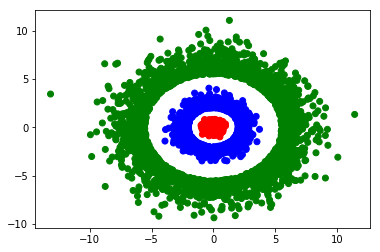

In [11]:
plt.scatter([X[:,0]],[X[:,1]], color=np.array(colors)[np.array(np.argmax(y,axis=1).reshape(-1))])

In [12]:
nodes=[10]*3+[3]

In [13]:
modelGD=TSML.PReLUNet(nodes,X.shape[1],X.shape[0],task="Classification",scaleweights=True,stochastic=False,seed=200)
start=time.time()
modelGD.train(X,y,2000,1e-6)
end=time.time()

51.0070321559906


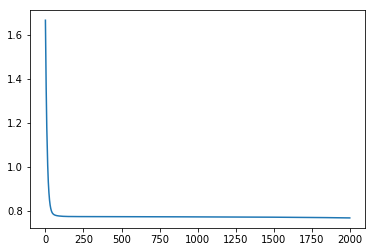

In [14]:
print(end-start)
plt.plot(range(len(modelGD.error)),modelGD.error)

In [15]:
modelGD.error[-1]

0.7687449283759523

In [19]:
modelSGD=TSML.PReLUNet(nodes,X.shape[1],X.shape[0],task="Classification",scaleweights=True, stochastic=True, seed=200)
start=time.time()
modelSGD.train(X,y,10,1e-6)
end=time.time()

37.10084056854248


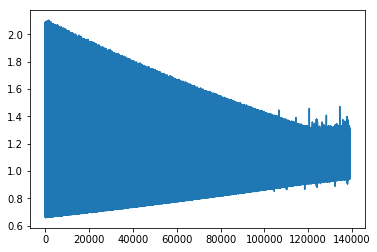

In [20]:
print(end-start)
plt.plot(range(len(modelSGD.error)),modelSGD.error)

In [34]:
modelSGD.cost(y,modelSGD.probabilities)

0.7739706595614244

In [37]:
start=time.time()
modelSGD.train(X,y,10,1e-6)
end=time.time()
print(end-start)

37.930579662323


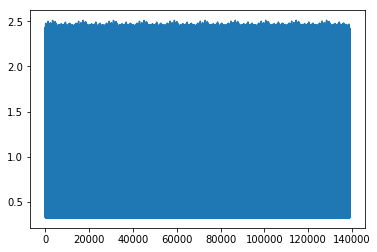

In [38]:
plt.plot(range(len(modelSGD.error)),modelSGD.error)